<a href="https://colab.research.google.com/github/stalin-dalia/loan_prediction/blob/main/loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()


Saving loan.csv to loan.csv


In [2]:
import pandas as pd

df = pd.read_csv('loan.csv')  # Use the same name as your uploaded file
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# View basic info about the dataset
df.info()

# View summary statistics
df.describe()

# Check the shape of the dataset
print("Shape of dataset:", df.shape)

# See the first 5 rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    object 
 2   Married            601 non-null    object 
 3   Dependents         611 non-null    object 
 4   Education          599 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    582 non-null    object 
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   592 non-null    float64
 10  Credit_History     600 non-null    float64
 11  Property_Area      564 non-null    float64
 12  Loan_Status        614 non-null    object 
 13  Unnamed: 13        614 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 67.3+ KB
Shape of dataset: (614, 14)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Check how many missing values are there
df.isnull().sum()


,0
Loan_ID,0
Gender,0
Married,13
Dependents,3
Education,15
Self_Employed,0
ApplicantIncome,32
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,22


In [5]:
# Fill missing categorical values with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Fill numerical value (LoanAmount) with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Confirm again that all missing values are handled
df.isnull().sum()


/tmp/ipython-input-5-3784386770.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-5-3784386770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,15
Self_Employed,0
ApplicantIncome,32
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


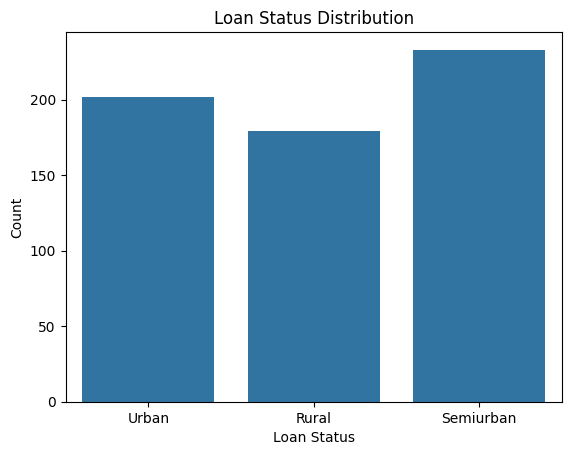

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()



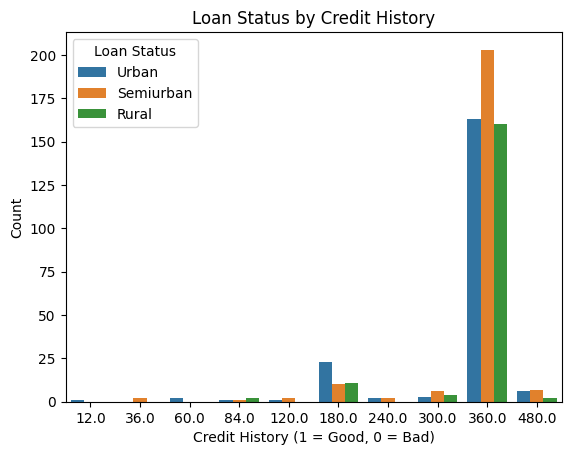

In [7]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History (1 = Good, 0 = Bad)")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


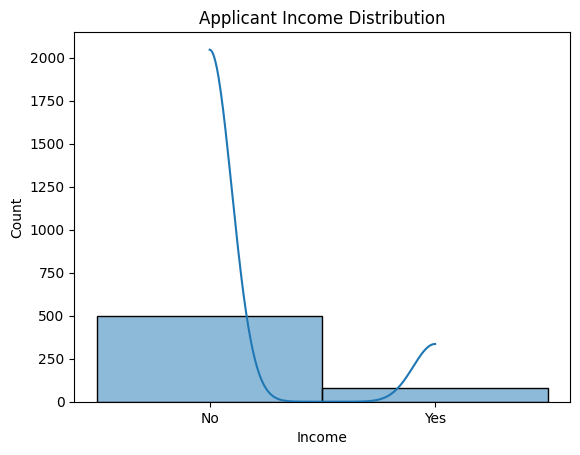

In [8]:
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title("Applicant Income Distribution")
plt.xlabel("Income")
plt.show()


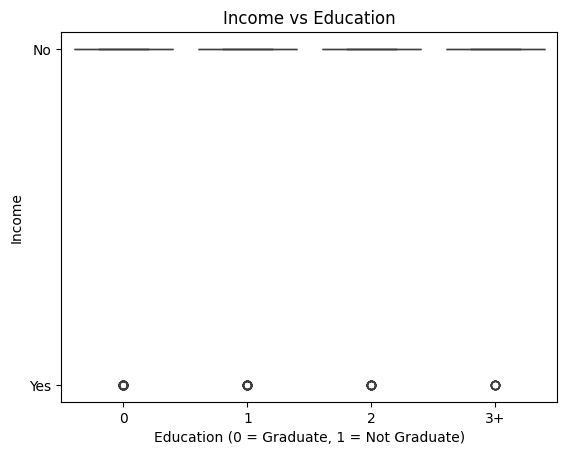

In [9]:
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title("Income vs Education")
plt.xlabel("Education (0 = Graduate, 1 = Not Graduate)")
plt.ylabel("Income")
plt.show()


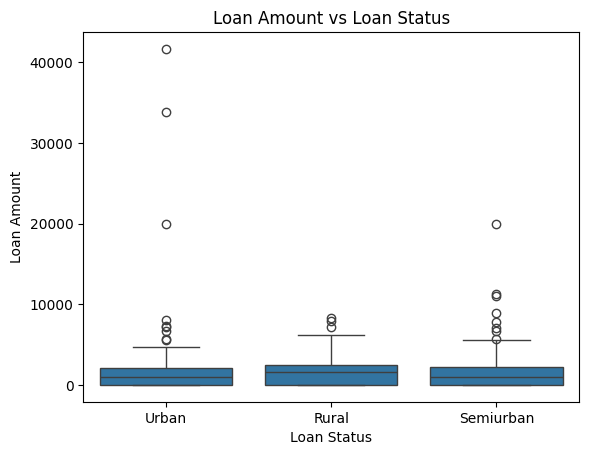

In [10]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title("Loan Amount vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()


In [11]:
df.drop('Loan_ID', axis=1, inplace=True)


In [12]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
le = LabelEncoder()

# List of columns to encode
cols = ['Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status']

# Apply Label Encoding to each
for col in cols:
    df[col] = le.fit_transform(df[col])

# Check first few rows
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13
0,0,1,0,0,0,No,5849,0.0,120.0,360.0,1,2,Y
1,1,1,1,1,0,No,4583,1508.0,128.0,360.0,1,0,N
2,2,1,1,0,0,Yes,3000,0.0,66.0,360.0,1,2,Y
3,3,1,1,0,1,No,2583,2358.0,120.0,360.0,1,2,Y
4,4,1,0,0,0,No,6000,0.0,141.0,360.0,1,2,Y


In [13]:
# Features (inputs)
X = df.drop('Loan_Status', axis=1)

# Target (output)
y = df['Loan_Status']


In [14]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Check shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (491, 12)
Testing data shape: (123, 12)


In [16]:
# Check data types in features
X.dtypes


,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,object
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode all object-type columns
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])


In [18]:
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)


In [19]:
# Re-split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4065040650406504
Confusion Matrix:
 [[12 16 10]
 [ 5 22 15]
 [ 8 19 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.32      0.38        38
           1       0.39      0.52      0.44        42
           2       0.39      0.37      0.38        43

    accuracy                           0.41       123
   macro avg       0.42      0.40      0.40       123
weighted avg       0.42      0.41      0.40       123

